## Day 83 Lecture 2 Assignment

In this assignment, we will learn about other optimization algorithms. We will create a neural network and try out the different optimization algorithms and compare their performance.

In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense

In this assignment, we will be using the cancer data that we have worked with in previous lessons. The pre-processed data is loaded below.

In [2]:
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/cancer_processed.csv')

In [ ]:
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


As you may recall, diagnosis is the target variable. One hot encode the diagnosis column.

In [3]:
# Answer below:

cancer_oh = pd.get_dummies(cancer, columns=['diagnosis'], drop_first=True)
cancer_oh

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1


Split the data into train and test with 20% of the data in test.

In [4]:
# Answer below

from sklearn.model_selection import train_test_split

X = cancer_oh.drop(['diagnosis_M'], axis=1)
y = cancer_oh.diagnosis_M

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale all other variables using the standard scaler.

In [5]:
# Answer below:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

Generate a sequential model consisting of 5 layers. The layers should be of size 128, 64, 32, 32, 1. Use the appropriate activation for the output layer based on the type of prediction algorithm we are producing.

In [6]:
# Answer below

def build_model(opt='Adam'):
  model = Sequential()
  #first
  model.add(Dense(128, input_dim=X_train_scale.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  #last layer/output
  model.add(Dense(1, activation='sigmoid')) #binary

  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  
  return model

Initialize a SGD optimizer with learning rate 0.05 and momentum 0.9.

In [7]:
# Answer below:

from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate=0.5, momentum=0.9)

Compile and fit the model using the appropriate loss function and metric and use the optimizers defined above.

batch size = 100, epochs = 200

In [9]:
# Answer below:

m_sgd = build_model(opt=sgd)


h_sgd = m_sgd.fit(X_train_scale, y_train, 
                            validation_data=(X_test_scale, y_test), batch_size=100, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 109ms/step - loss: 0.6643 - accuracy: 0.7580 - val_loss: 0.1245 - val_accuracy: 0.9386
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 0.2514 - accuracy: 0.9227 - val_loss: 0.1033 - val_accuracy: 0.9737
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7093 - accuracy: 0.8326 - val_loss: 0.1877 - val_accuracy: 0.9298
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 0.4639 - accuracy: 0.8505 - val_loss: 0.5105 - val_accuracy: 0.8421
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6300 - accuracy: 0.8279 - val_loss: 0.2223 - val_accuracy: 0.9386
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 90.3407 - accuracy: 0.8621 - val_loss: 100693744.0000 - val_accuracy: 0.6228
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.5513 - val_loss: nan - val_accuracy: 0.6228
Epoch 8/200
5/5 [=

Define the RMSprop optimizer with a learning rate of 0.05.

In [10]:
# Answer below:

from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=0.05)

Compile and fit the model using the optimizer defined above. What do you notice about the accuracy?

In [11]:
# Answer below:

model_rmsprop = build_model(opt=rmsprop)


histroy_rmsprop = model_rmsprop.fit(X_train_scale, y_train, 
                                    validation_data=(X_test_scale, y_test), batch_size=100, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 77ms/step - loss: 10.1221 - accuracy: 0.5109 - val_loss: 0.4347 - val_accuracy: 0.8947
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 0.3286 - accuracy: 0.8975 - val_loss: 0.1248 - val_accuracy: 0.9561
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 0.1742 - accuracy: 0.9367 - val_loss: 0.0883 - val_accuracy: 0.9649
Epoch 4/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1620 - accuracy: 0.9400 - val_loss: 0.0996 - val_accuracy: 0.9649
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 0.1427 - accuracy: 0.9476 - val_loss: 0.1081 - val_accuracy: 0.9649
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1881 - accuracy: 0.9344 - val_loss: 0.1127 - val_accuracy: 0.9737
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 0.1209 - accuracy: 0.9610 - val_loss: 0.1082 - val_accuracy: 0.9474
Epoch 8/200
5/5 [==

Define the Adam optimizer with learning rate 0.01

In [20]:
# Answer below:

from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.01)

Compile and fit the model using the optimizer defined above. How does the peformance differ with this optimizer?

In [21]:
# Answer below:

model_adam = build_model(opt=adam)

#fitting
hist_adam = model_adam.fit(X_train_scale, y_train, 
                           validation_data=(X_test_scale, y_test), batch_size=100, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 45ms/step - loss: 0.5239 - accuracy: 0.8366 - val_loss: 0.0989 - val_accuracy: 0.9561
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1759 - accuracy: 0.9319 - val_loss: 0.0932 - val_accuracy: 0.9561
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 0.1386 - accuracy: 0.9393 - val_loss: 0.0924 - val_accuracy: 0.9737
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 0.1060 - accuracy: 0.9541 - val_loss: 0.0815 - val_accuracy: 0.9825
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 0.1106 - accuracy: 0.9500 - val_loss: 0.0802 - val_accuracy: 0.9825
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0990 - accuracy: 0.9581 - val_loss: 0.0757 - val_accuracy: 0.9825
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0851 - accuracy: 0.9645 - val_loss: 0.0836 - val_accuracy: 0.9737
Epoch 8/200
5/5 [===

Now change the learning rate to 0.1 in your Adam optimizer and compare the results (both speed and accuracy).

In [23]:
# Answer below:

adam = Adam(learning_rate=0.1)

adam_model = build_model(opt=adam)

adam_hist = adam_model.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), batch_size=100, epochs=200)



Epoch 1/200
5/5 [==============================] - 1s 73ms/step - loss: 8.1595 - accuracy: 0.3970 - val_loss: 1.3998 - val_accuracy: 0.1842
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 0.9141 - accuracy: 0.4497 - val_loss: 0.4371 - val_accuracy: 0.6228
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 0.4245 - accuracy: 0.6267 - val_loss: 0.2726 - val_accuracy: 0.9474
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 0.2152 - accuracy: 0.9241 - val_loss: 0.1803 - val_accuracy: 0.9561
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 0.4523 - accuracy: 0.8796 - val_loss: 0.5586 - val_accuracy: 0.9649
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.6488 - accuracy: 0.9190 - val_loss: 0.1970 - val_accuracy: 0.9561
Epoch 7/200
5/5 [==============================] - 0s 12ms/step - loss: 0.2017 - accuracy: 0.9233 - val_loss: 0.1451 - val_accuracy: 0.9386
Epoch 8/200
5/5 [=====

In [25]:
def vis_history(hist):
  df = pd.DataFrame(hist.history)
  df[['loss', 'val_loss']].plot(figsize=(12,8))
  df[['accuracy', 'val_accuracy']].plot(figsize=(12,8))

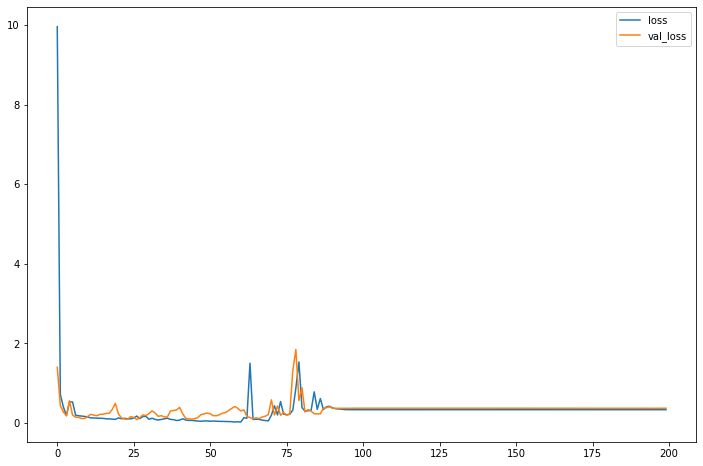

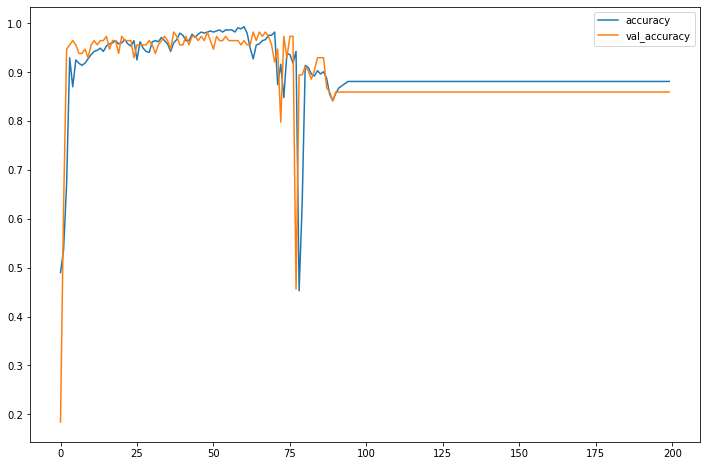

In [27]:
vis_history(adam_hist)